In [1]:
%pylab inline
import math

%pylab is deprecated, use %matplotlib inline and import the required libraries.
Populating the interactive namespace from numpy and matplotlib


In [2]:
def sense(x):
    return x

def eulerMethod(dt, x, u):
    #Euler method
    x += u * dt
    return x

def pcontrol(t, x, K, xd):
    return K * (xd - x)

## Implementation of Simulator Class

In [3]:
class Simulator:
    
    def __init__(self, control, sense, solver):
        self.control = control
        self.sense = sense
        self.solver = solver
    
    def run(self, start_time = 0, end_time = 1, start_position=array([0., 0.]), dt = 1e-3):
        time = linspace(start_time, end_time, int(end_time / dt) + 1)

        x = copy(start_position)
        x_t = [copy(x)]

        for t in time:
            y = self.sense(x)
            u = self.control(t, y)
            x = self.solver(dt, x, u)
            x_t.append(copy(x))
            
        return array(x_t)
    
    def run_and_plot_error(self, start_time = 0, end_time = 1, desired_position=array([1., 1.]), start_position=array([0., 0.]), dt = 1e-3):
        x_t = self.run(start_time, end_time, start_position, dt)
        grid()
        
        time = linspace(start_time, end_time, int(end_time / dt) + 1)
        time = np.append(time, float(time[-1]) + dt)
        
        error = array([desired_position - x for x in x_t])
                        
        plot(time, error[:,0], label='x Error')
        plot(time, error[:,1], label='y Error')
        legend()
        show()
        
        grid()
        plot(time, x_t[:,0], label='x Position')
        plot(time, x_t[:,1], label='y Position')
        legend()
        show()


    def run_and_plot_2d(self, start_time = 0, end_time = 1, start_position=array([0., 0.]), dt = 1e-3):
        x_t = self.run(start_time, end_time, start_position, dt)
        grid()
        plot(x_t[:,0], x_t[:,1])
        if len(x_t) > 1:
            arrow(x_t[0, 0], x_t[0, 1], x_t[1, 0] - x_t[0, 0], x_t[1, 1] - x_t[0, 1], shape='full', lw=10, length_includes_head=True, head_width=.05, color='r')

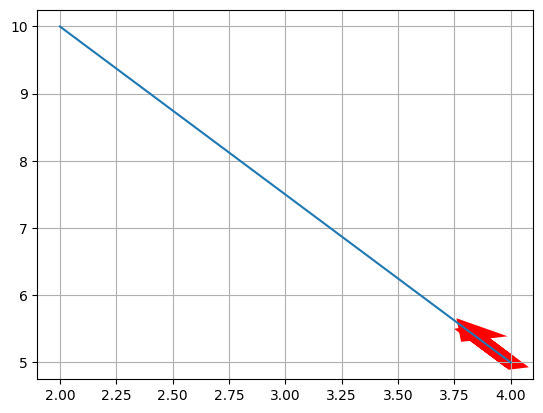

In [4]:
def control(t, x):
    return pcontrol(t, x, 100, np.array([2., 10.]))

sim = Simulator(control, sense, eulerMethod)
sim.run_and_plot_2d(start_position=np.array([4., 5.]), dt=1e-3)

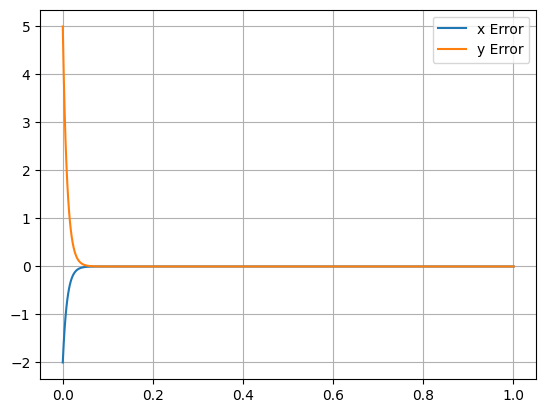

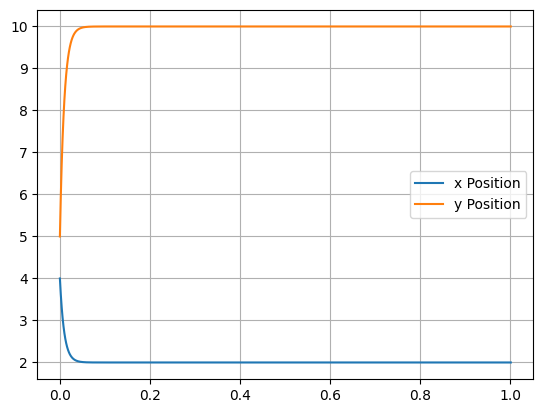

In [5]:
def control(t, x):
    return pcontrol(t, x, 100, np.array([2., 10.]))

sim = Simulator(control, sense, eulerMethod)
sim.run_and_plot_error(start_position=np.array([4., 5.]), desired_position=np.array([2., 10.]), dt=1e-3)

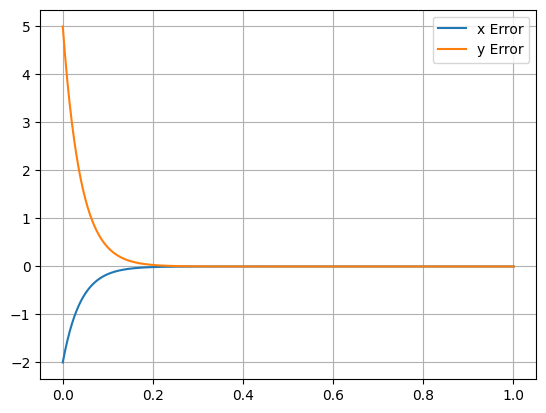

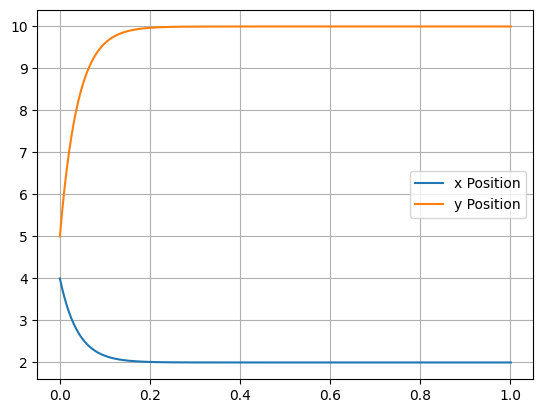

In [6]:
def control(t, x):
    return pcontrol(t, x, 25, np.array([2., 10.]))

sim = Simulator(control, sense, eulerMethod)
sim.run_and_plot_error(start_position=np.array([4., 5.]), desired_position=np.array([2., 10.]), dt=1e-3)

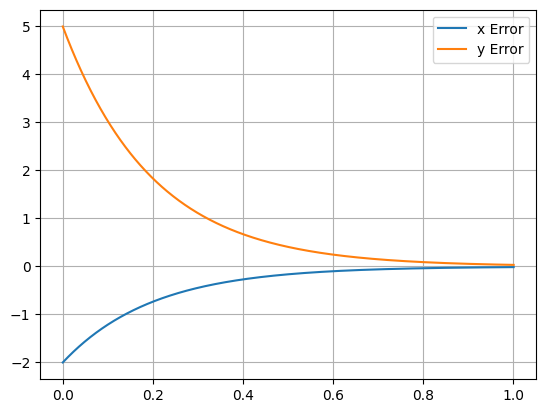

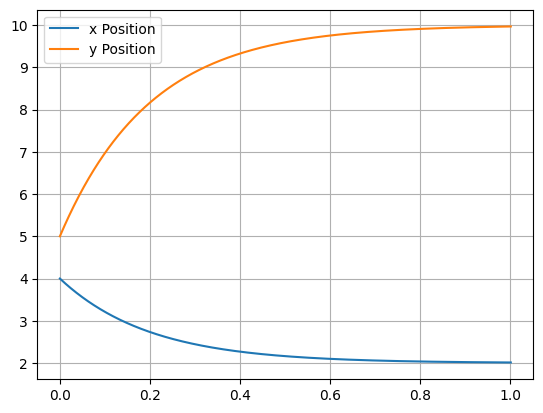

In [7]:
def control(t, x):
    return pcontrol(t, x, 5, np.array([2., 10.]))

sim = Simulator(control, sense, eulerMethod)
sim.run_and_plot_error(start_position=np.array([4., 5.]), desired_position=np.array([2., 10.]), dt=1e-3)